# **GEOET - Stress Factor: La Vite**

## **PERISSINI FEDERICO 218299**
## **FINOTTI JACOPO 217936**

Authors: Concetta D'Amato.
This work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
___

## **Evaporazione attuale**
Il- sistema GEOET offre la possibilità di calcolare la **Evaporazione attuale** considerando differenti modelli di evapotraspirazione potenziale. 
L'evaporazione attuale viene calcolata moltiplicando- l'evapotraspirazione potenziale con il fattore di stress  $g_{s}$. 

Il fattore di stress viene calcolato usando il modello proposto da Macfarlane nel 2004, ma invece che utilizzare il fattore di stress dato dal potenziale idrico delle foglie, usiamo quello basato sulla comopsizione del suolo, proposto dalla FAO.

\begin{equation}
\Large\ ET_{eff}=ET_{pot}\cdot g_{s}
\end{equation}

\begin{equation}
\Large\ g_{s} = g_{s}max\cdot f(R_{par})\cdot f(T_{a})\cdot f(VPD) \cdot K_{s}
\end{equation}

where:
- $g_{s}max $ è la conduttanza senza nessuna tipologia di stress e in condizioni di buona idratazione;
- $f(R_{par})$ è il coefficinete di stress come una funzione di radiazione fotosinteticamnete attiva; 
- $f(T_{a})$ è il coefficiente di stress come una funzione della temperatura dell'aria; 
- $f(VPD) $ è il coefficiente di stress come una funzione della pressione di vapore;
- $K_{s} $ è il coefficiente di stress come una funzione del contenuto d'acqua. 

---
### **Stress idrico**

IL **coefficnete di stress idrico** $K_{s}$ viene calcolato usando le [(FAO formulation)](https://www.fao.org/3/X0490E/x0490e0e.htm):


\begin{equation}
\Large\ K_{s} = \frac{TAW - D_{r}}{TAW-RAW}
\end{equation}

dove

- $TAW$ è la **disponibilità totale di acqua nel suolo** nella zona delle radici[mm]; 
- $D_{r}$ è **l'impoverimento nella zona delle radici (depletion)**;
- $RAW$ è **l'acqua prontamente disponibile nel suolo** nella zona delle radici [mm], la frazione di acqua che le piante possono estrarre molto facilmente. 


La **totale disponibilità di acqua nel suolo** $TAW$ viene calcolata con la seguente equazione: 

\begin{equation}
\Large\ TAW = 1000 (\theta_{FC}-\theta_{WP})\cdot Z_{r}
\end{equation}

dove

- $\theta_{FC}$ è il contenuto d'acqua alla **field capacity** [-] [(Table19)](http://www.fao.org/3/X0490E/x0490e0c.htm), parametro per cui c'è equilibrio tra forze capillari per la risalita e forza di gravità;
- $\theta_{WP}$ è il contenuto d'acqua al **punto di appassimento** [-]; contenuto minimo d'acqua a cui una pianta riesce a sopravvivere, è caratteristica della pianta;
- $Z_{r}$ è la **profondità delle radici** [(Table 22)](http://www.fao.org/3/X0490E/x0490e0e.htm).

La quantità di **acqua prontamente disponibile nel suolo** $RAW$ viene calcolata in accordo con la seguente equazione: 

\begin{equation}
\Large\ RAW = p \cdot TAW 
\end{equation}

dove
- $p$ è la frazione media di Acqua Totale Disponibile nel Suolo (TAW) che può essere ridotta dalla zona delle radici prima di raggiungere lo stress del suolo  (reduction in ET) occurs [0-1].

[Here (Table 22)](http://www.fao.org/3/X0490E/x0490e0e.htm), è possibile trovare i valori di **depletation fraction** per le differnti colture.

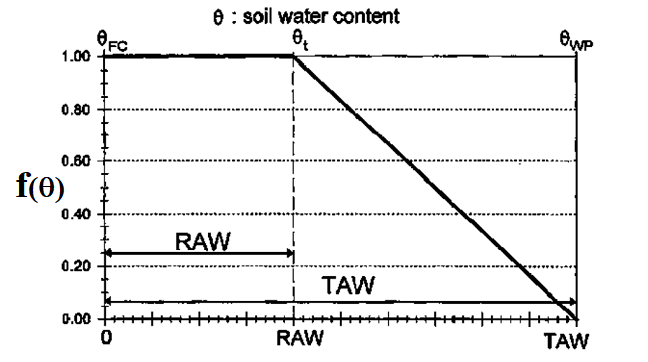

In [1]:
from IPython.display import Image
import os
oms_project_path = os.path.dirname(os.getcwd())
Image(oms_project_path+"/Images/waterstress.png")

--- 
### **Stress Temperatura dell'aria**

Il **fattore di stress della temperatura dell'artia** può essere calcolato come:


\begin{equation}
\Large\ f_{T} = b(T_{a}-T_{low})(T_{up}-T_{a})^c
\end{equation}

dove b e c vengono definite come: 


\begin{equation}
\Large\ c = \frac{T_{up} - T_{opt}}{T_{opt} - T_{low}}
\end{equation}

\begin{equation}
\Large\ b= \frac{1}{(T_{opt} - T_{low})(T_{up} - T_{opt})^c}
\end{equation}

- $T_{opt}$ è la **temperatura** alla massima conduttanza [°C];
- $T_{low}$ e $T_{up}$ sono **le temperature più basse e alte** nel range per cui la conduttanza stomale viene prevista positivamente[°C].

If \begin{equation}
\Large\ T_{low} < T_{air} < T_{up} \\\ f(T) = 0 
\end{equation}

White e al. (1999) assegnarono i valori di $T_{low}$ , $T_{opt}$ e $T_{up}$ pari a 0°C, 17°C e 38°C. Questi parametri possono essere impostati a priori o modificati.

--- 
### **Stress da Radiazione solare**

Lo **stress da radiazione solare** può iessere calcolato come:


\begin{equation}
\Large\ f(R_{sw}) = (\frac{1}{2\theta}(\alpha\ R_{sw}+1-\sqrt{ (\alpha\ R_{sw}+1)^2 -4\theta \alpha\ R_{sw}  }))^{-1}
\end{equation}

dove $\alpha$ e $\theta$ sono i parametri di pendenza  eforma della funzione $f(R_{par})$ e sono imposti pari a 0.005 e 0.85 [-].

--- 
### **Stress da deficit di vapore acqueo**

Lo **stress da deficit di vapore acqueo** può essere calcolato come:


\begin{equation}
\Large\ f(VPD) = 1.1\cdot exp(-0.63\cdot VPD)
\end{equation}

--- 

### **Pianta ortaggio sotto studio**

La tipologia di pianta che abbiamo scelto per lo studio dei fattori di stress è la pianta della Vite destinata alla produzione del vino.

Di seguito viene mostrata un'immagine.

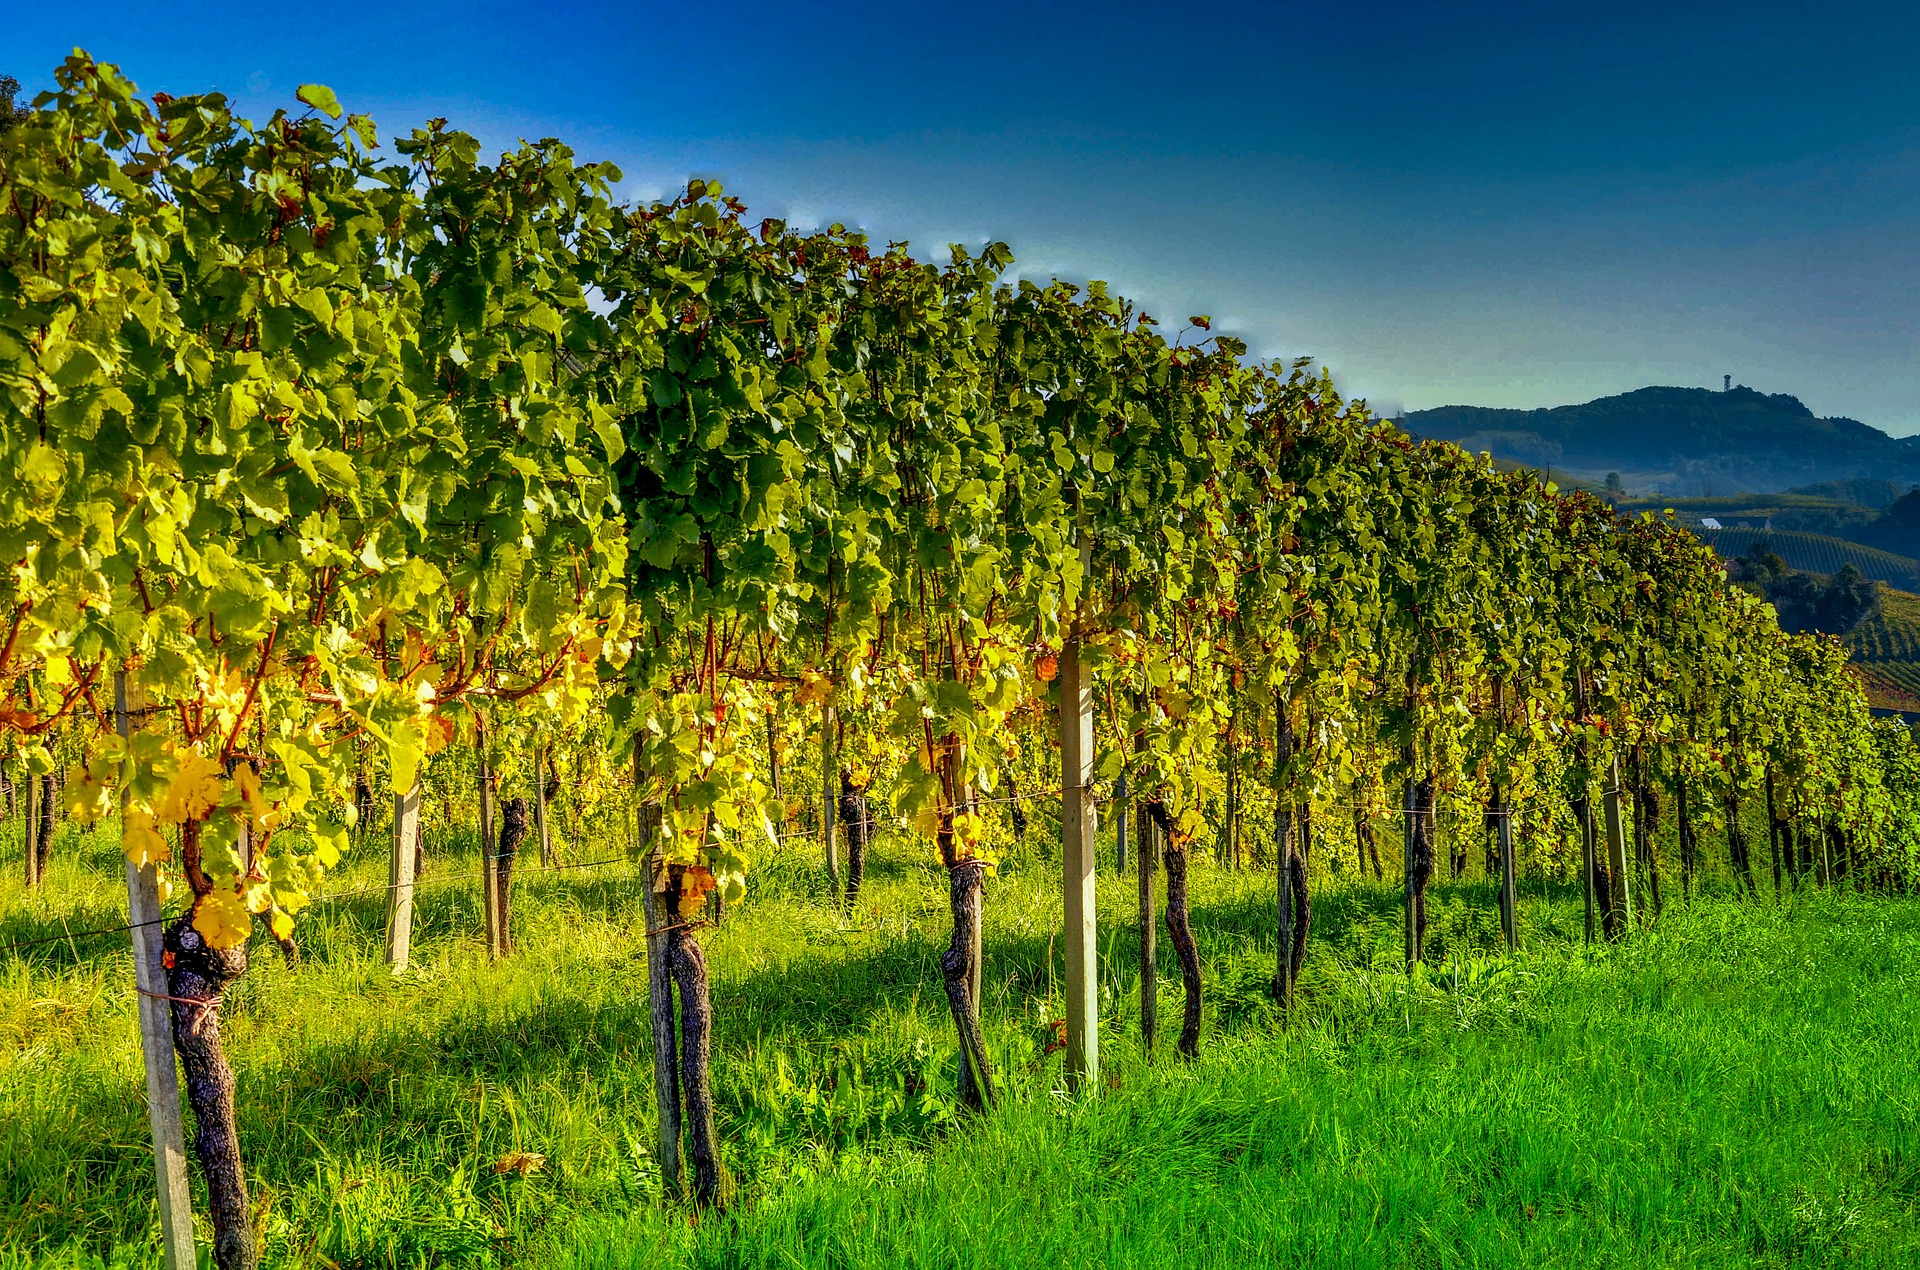

In [2]:
from IPython.display import Image
import os
oms_project_path = os.path.dirname(os.getcwd())
Image(oms_project_path+"/Images/vite.jpg")

# **Parametri del caso di studio**

Abbiamo scelto per la nostra esercitazione i seguenti parametri:

**Pianta della Vite**:
- TABELLA 22:
    - root depth: 1.8; 
    - depletion fraction: 0.45
-  TABELLA 17:
    - Crop coefficient: 0.65.
- altezza pianta 0.8 [m]

**Valpolicella**:
- Terreno: Loamy sand -> TABELLA 19 $\theta_{FC}$= 0.15;  $\theta_{WP}$= 0.07
- Temperatura minime e massime:
    - T0: 17.0  $[°C]$
    - Th: 36.3  $[°C]$

**Collio**:
- Terreno: Silt clay loam -> TABELLA 19 $\theta_{FC}$= 0.35;  $\theta_{WP}$= 0.20
- Temperatura minime e massime:
    - T0: 16.2 $[°C]$
    - Th: 37.4 $[°C]$